In [1]:
x = [12,15,20,10]

In [2]:
y = [67,71,80,34]

In [3]:
import pandas as pd

In [5]:
X = pd.DataFrame(x)

In [6]:
Y = pd.DataFrame(y)

In [47]:
#Importing linear regression model to lab
from sklearn.linear_model import LinearRegression

In [10]:
Lr = LinearRegression()

In [11]:
Lr.fit(X,Y)

LinearRegression()

In [12]:
Lr.coef_ 

array([[3.84140969]])

In [13]:
Lr.intercept_

array([8.25991189])

In [19]:
import numpy as np

In [33]:
arr = np.array([17,18,20])

In [34]:

arr1= arr.reshape(-1,1)

In [38]:

predicted_value=  Lr.predict(arr1)
true_values = np.array([74,76,85]).reshape(-1,1)

In [37]:
print(predicted_value)

[[73.56387665]
 [77.40528634]
 [85.08810573]]


In [39]:
Lr.score(true_values,predicted_value)

-2321.4285714285697

In [43]:
from sklearn import metrics
from math import sqrt

In [44]:
# calculatimg r0ot mean square error
sqrt(metrics.mean_squared_error(true_values,predicted_value))

0.8510377785067555

In [46]:
#Ridge regression
#Regularized model give better performance aand less errors

from sklearn.linear_model import Ridge

In [64]:
rd = Ridge(alpha = 1.0)
rd.fit(X, Y)

Ridge()

In [65]:

predicted1 =rd.predict(arr1)

In [66]:
sqrt(metrics.mean_squared_error(true_values, predicted1))

0.7758545213594374

In [3]:
#import important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [86]:
df = pd.read_csv('iphone_purchase_records.csv')

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           400 non-null    object
 1   Age              400 non-null    int64 
 2   Salary           400 non-null    int64 
 3   Purchase Iphone  400 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 12.6+ KB


In [58]:
df.isna().sum()

Gender             0
Age                0
Salary             0
Purchase Iphone    0
dtype: int64

In [59]:
df.head()

,Gender,Age,Salary,Purchase Iphone
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [60]:
df['Purchase Iphone'].nunique()

2

In [12]:
df['Rating'].nunique()

39

In [13]:
df['Rating'].value_counts()

4.4    1108
4.3    1076
4.5    1037
4.2     951
4.6     823
4.1     707
4.0     567
4.7     499
3.9     386
3.8     303
5.0     274
3.7     239
4.8     234
3.6     174
3.5     163
3.4     128
3.3     102
4.9      87
3.0      83
3.1      69
3.2      63
2.9      45
2.8      42
2.6      25
2.7      25
2.5      21
2.3      20
2.4      19
1.0      16
2.2      14
1.9      13
2.0      12
1.7       8
2.1       8
1.8       8
1.6       4
1.4       3
1.5       3
1.2       1
Name: Rating, dtype: int64

(array([  17.,   18.,   41.,   74.,  137.,  445.,  879., 1660., 4172.,
        1917.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

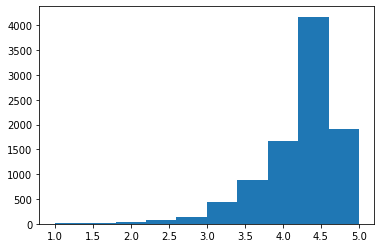

In [14]:
plt.hist(df['Rating'])

/usr/local/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Rating'>

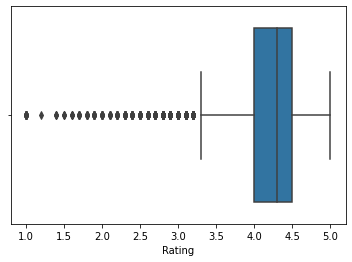

In [15]:
sns.boxplot(df['Rating'])

In [16]:
Q1 = np.percentile(df['Rating'],25, interpolation='midpoint')
Q3 = np.percentile(df['Rating'],75, interpolation='midpoint')
IQR = Q3-Q1

In [17]:
upper = np.where(df['Rating']>=(Q3+1.5*IQR))
lower = np.where(df['Rating']<=(Q1-1.5*IQR))

In [20]:
print(lower)

(array([  85,  198,  299,  300,  464,  476,  498,  502,  504,  511,  512,
        530,  533,  538,  572,  594,  600,  602,  607,  615,  628,  631,
        643,  809,  862, 1124, 1468, 1477, 1487, 1492, 1510, 1698, 2003,
       2164, 2175, 2207, 2212, 2229, 2241, 2249, 2263, 2271, 2313, 2318,
       2321, 2322, 2333, 2354, 2359, 2378, 2382, 2391, 2395, 2880, 2882,
       2990, 2998, 3024, 3106, 3109, 3119, 3125, 3136, 3317, 3340, 3545,
       3587, 3801, 3806, 3807, 3817, 3850, 3854, 3910, 3971, 4001, 4004,
       4008, 4011, 4026, 4033, 4047, 4048, 4063, 4067, 4090, 4094, 4158,
       4200, 4202, 4290, 4306, 4307, 4312, 4322, 4324, 4325, 4334, 4354,
       4397, 4399, 4408, 4438, 4442, 4446, 4450, 4451, 4453, 4457, 4465,
       4469, 4520, 4525, 4527, 4551, 4585, 4588, 4626, 4629, 4697, 4698,
       4699, 4702, 4703, 4705, 4706, 4712, 4718, 4719, 4726, 4727, 4728,
       4788, 4829, 4831, 4838, 4875, 4888, 4896, 4898, 4903, 4908, 4919,
       4927, 4940, 4941, 4953, 4955, 4958, 4990, 5

In [21]:
print(upper)

(array([], dtype=int64),)


In [22]:
df.drop(lower[0], inplace=True)

KeyError: '[ 628  631  643 4307 4451 4453 4457 4465 4520 4551 4697 5132 5166 5172\n 5231 5253 5414 5498 5690 5800 5923 5927 5991 6122 6154 6278 6292 6425\n 6436 6437 6464 6479 6528 6624 6638 6642 6668 6703 6704 6817 6832 6855\n 6888 6904 6940 6954 6967 7058 7120 7121 7157 7168 7169 7181 7199 7226\n 7230 7233 7234 7294 7504 7528 7702 7804 7832 7843 7893 7897 7901 8065\n 8105 8154 8160 8169 8262 8349 8506 8565 8583 8600 8831 8833 8834 8839\n 8854 9012 9019 9054 9097 9185] not found in axis'

In [107]:
X = pd.DataFrame(df.drop(['Purchase Iphone'], axis =1))
Y = pd.DataFrame(df['Purchase Iphone'])

In [108]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(X,Y, test_size=0.20, random_state=192)

In [109]:
print(train_x.shape)
print(test_x.shape)
print(train_y.shape)
print(test_y.shape)

(320, 3)
(80, 3)
(320, 1)
(80, 1)


In [48]:
print(train_y)

3586     4.7
9382     3.7
7834     4.3
5969     4.8
473      4.2
        ... 
1386     4.6
4376     4.5
9705     5.0
7900     3.6
10777    3.9
Name: Rating, Length: 7488, dtype: float64


In [98]:
from sklearn.preprocessing import LabelEncoder

In [101]:
enc = LabelEncoder()
df['Gender1']= pd.DataFrame(enc.fit_transform(df['Gender']))

In [106]:
df

,Age,Salary,Purchase Iphone,Gender1
0,19,19000,0,1
1,35,20000,0,1
2,26,43000,0,0
3,27,57000,0,0
4,19,76000,0,1
...,...,...,...,...
395,46,41000,1,0
396,51,23000,1,1
397,50,20000,1,0
398,36,33000,0,1


In [67]:
Lr = LinearRegression()
Lr.fit(train_x, train_y)

LinearRegression()

In [72]:

predicted =  pd.DataFrame(Lr.predict(test_x))

In [73]:
predicted

,0
0,63839.296772
1,64748.820013
2,70660.721076
3,66567.866494
4,68386.912975
...,...
75,64294.058393
76,69751.197836
77,70660.721076
78,64294.058393


In [85]:
from sklearn import metrics
from math import sqrt

sqrt(metrics.mean_squared_error(test_y, predicted))


31192.037568651012

In [83]:
type(predicted)

pandas.core.frame.DataFrame

In [76]:
from sklearn.linear_model import SGDRegressor

In [77]:
# using l2 penalty that is Ridge regression equilant
Sgd = SGDRegressor(penalty='l2')

In [110]:
from sklearn.linear_model import LogisticRegression

In [111]:
LR = LogisticRegression()
LR.fit(train_x, train_y)

/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [112]:
predicted1 = LR.predict(test_x)

In [117]:
print(metrics.accuracy_score(test_y, predicted1))
print(sqrt(metrics.mean_squared_error(test_y, predicted1)))

print(metrics.confusion_matrix(test_y, predicted1))
print(metrics.classification_report(test_y, predicted1))

0.7
0.5477225575051661
[[56  0]
 [24  0]]
              precision    recall  f1-score   support

           0       0.70      1.00      0.82        56
           1       0.00      0.00      0.00        24

    accuracy                           0.70        80
   macro avg       0.35      0.50      0.41        80
weighted avg       0.49      0.70      0.58        80



/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
